# Tarea 3
## Visualización

**Universidad del Valle de Guatemala**\
**Facultad de Ingeniería**\
**Departamento de Ciencias de la Computación**\
**Data Science**

### Integrantes
- Diego Leiva
- Pablo Orellana

## Librerias

In [1]:
# Datos
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
# Lectura de datos de los archivos csv
fracturas_df = pd.read_csv('data/cervical_fractures.csv')
consumos_df = pd.read_csv('data/fuel_consumption.csv')
seguros_df = pd.read_csv('data/insurance_policy.csv')

## Visualizaciones Originales

### Fracturas Cervicales

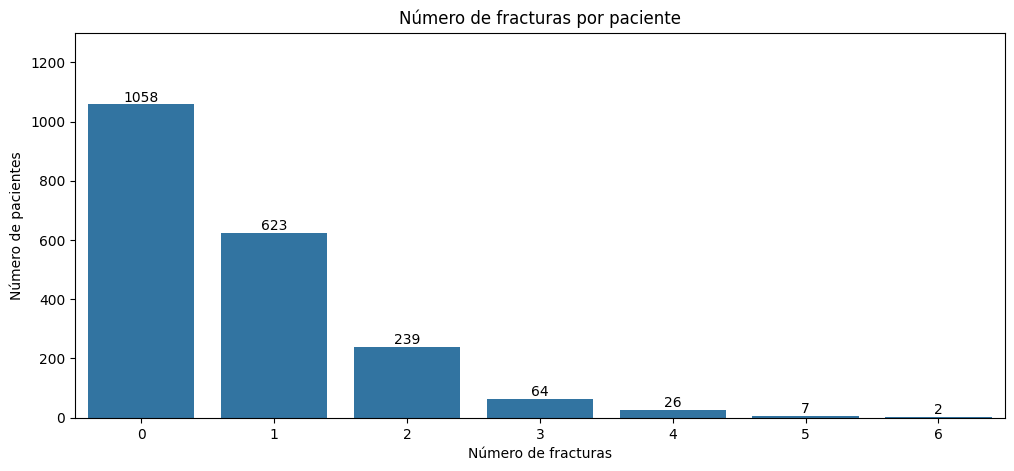

In [3]:
# Gráfico de barras de la cantidad de fracturas por paciente
plt.figure(figsize=(12,5))
# Se suman las fracturas por paciente 
ax = sns.countplot(x = fracturas_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1))
# Se añaden las etiquetas con el número de fracturas
for container in ax.containers:
    ax.bar_label(container)

# Se añaden los títulos y etiquetas
plt.title('Número de fracturas por paciente')
plt.xlabel('Número de fracturas')
plt.ylabel('Número de pacientes')
plt.ylim([0,1300])
plt.show()

### Consumos de Combustibles

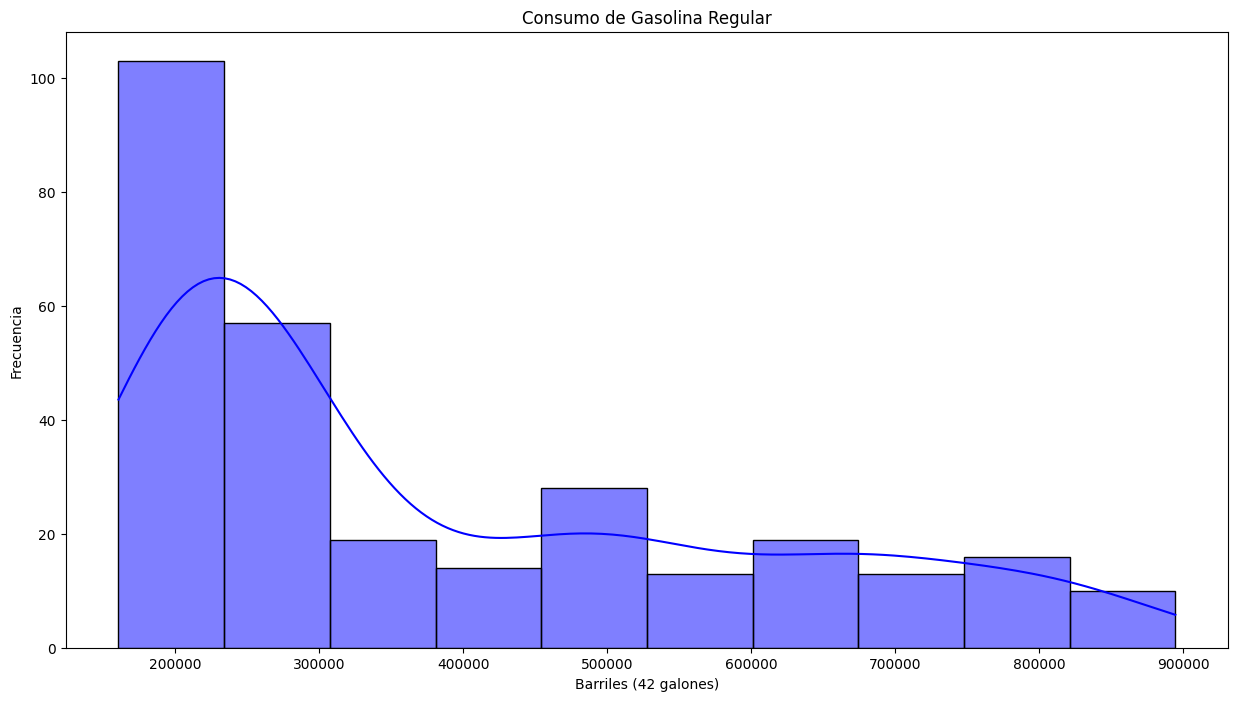

In [4]:
# Gráfico histograma del consumo de gasolina regular
plt.figure(figsize=(15, 8))
# Se añade la línea de densidad de probabilidad
sns.histplot(consumos_df['Gasolina Regular'], kde=True, color='blue')
# Se añaden los títulos y etiquetas
plt.title('Consumo de Gasolina Regular')
plt.xlabel('Barriles (42 galones)')
plt.ylabel('Frecuencia')
plt.show()

### Polizas de Seguros

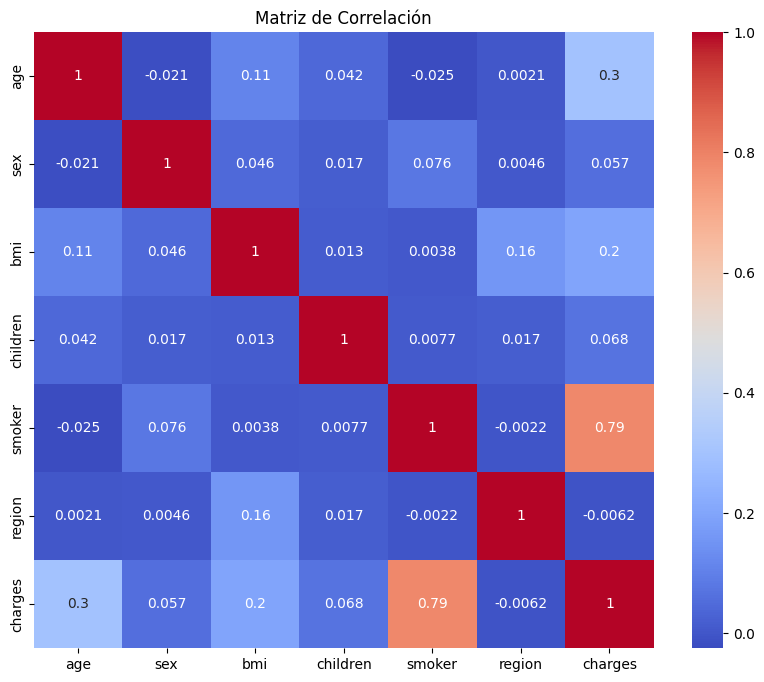

In [5]:
# Calcular la matriz de correlación
correlation_matrix = seguros_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

## Visualizaciones Mejoradas

### Audiencia sin conocimiento estadistico

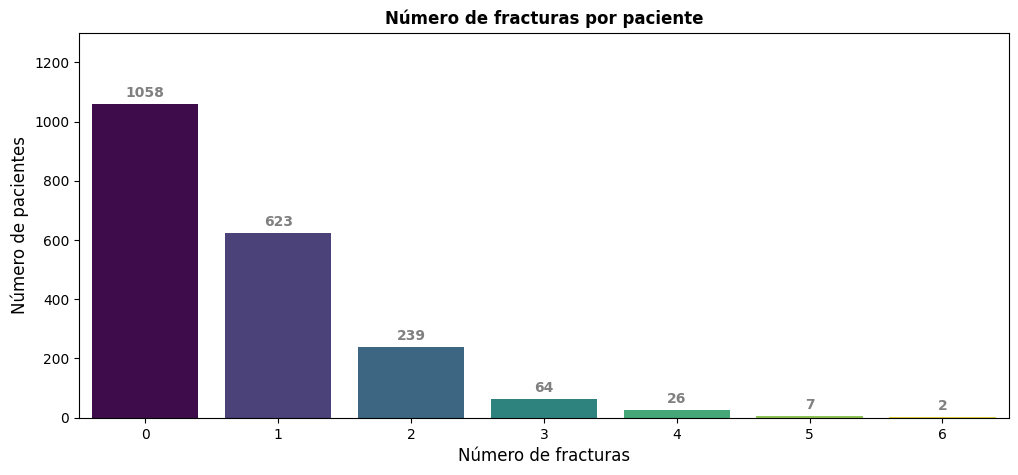

In [6]:
# Gráfico de barras de la cantidad de fracturas por paciente
plt.figure(figsize=(12,5))

# Se suman las fracturas por paciente y se generan barras de colores
ax = sns.countplot(x = fracturas_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1), 
                   hue=fracturas_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1),
                   palette='viridis', 
                   legend=False)

# Se añaden las etiquetas con el número de fracturas
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fontweight='bold', padding=3, color='gray')

# Se añaden los títulos y etiquetas con un tamaño de letra de 12
plt.title('Número de fracturas por paciente', fontsize=12, fontweight='bold')
plt.xlabel('Número de fracturas', fontsize=12)
plt.ylabel('Número de pacientes', fontsize=12)
plt.ylim([0,1300])
plt.show()

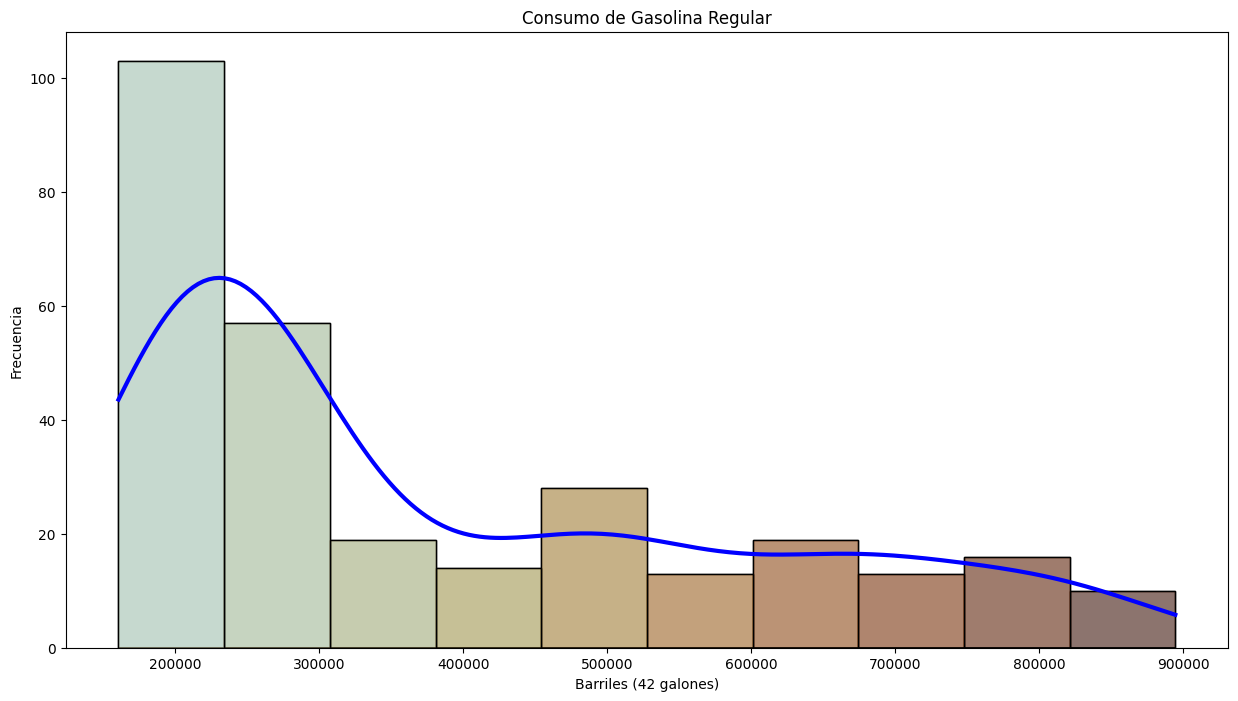

In [7]:
# Gráfico histograma del consumo de gasolina regular
plt.figure(figsize=(15, 8))

# Se agrega un hue para dividir los datos en 10 intervalos
consumos_df['HUE'] = pd.cut(consumos_df['Gasolina Regular'], bins=10)

# Se añade la línea de densidad de probabilidad
ax = sns.histplot(consumos_df['Gasolina Regular'], kde=True, line_kws={'lw':3})

# Se dibuja el histograma con el hue y se cambia el color de la línea
sns.histplot(data = consumos_df, 
             x ='Gasolina Regular', 
             hue='HUE',
             palette='YlOrBr',
             legend=False)
ax.lines[0].set_color('blue')

# Se añaden los títulos y etiquetas
plt.title('Consumo de Gasolina Regular')
plt.xlabel('Barriles (42 galones)')
plt.ylabel('Frecuencia')
plt.show()

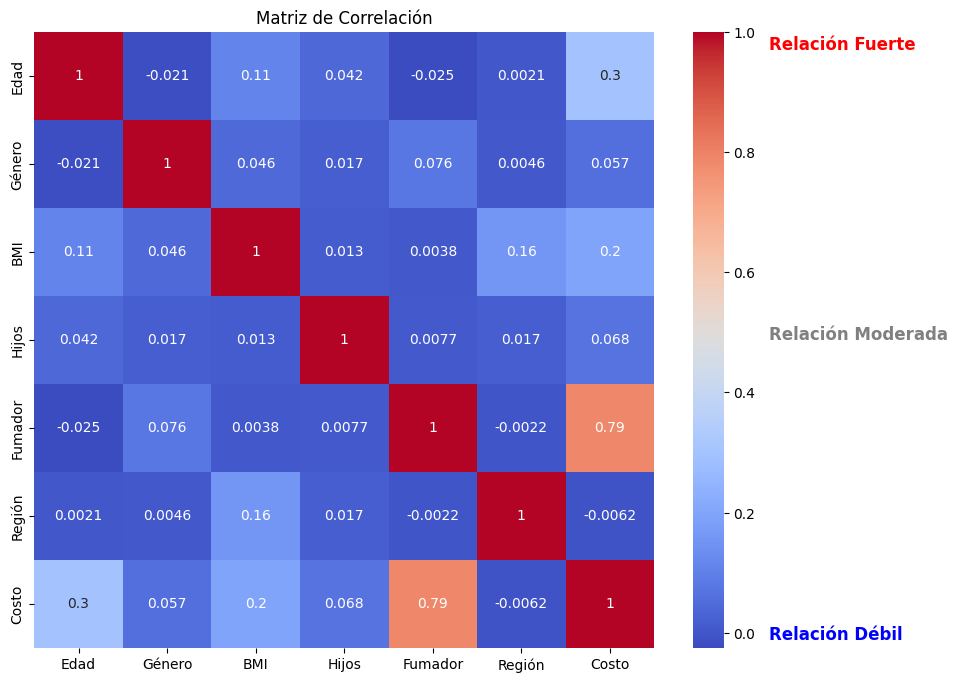

In [8]:
# Calcular la matriz de correlación
correlation_matrix = seguros_df.corr()

# Se cambian los nombres de las columnas e índices
correlation_matrix.columns = ['Edad', 'Género', 'BMI', 'Hijos', 'Fumador', 'Región', 'Costo']
correlation_matrix.index = ['Edad', 'Género', 'BMI', 'Hijos', 'Fumador', 'Región', 'Costo']

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
# Se añaden los valores de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Se añade el título y etiquetas adicionales para indicar la fuerza de la correlación
plt.title('Matriz de Correlación')
plt.text(8.3, 0.2, 'Relación Fuerte', fontsize=12, color='red', fontweight='bold')
plt.text(8.3, 3.5, 'Relación Moderada', fontsize=12, color='gray', fontweight='bold')
plt.text(8.3, 6.9, 'Relación Débil', fontsize=12, color='blue', fontweight='bold')
plt.show()

### Audiencia con Conocimiento Estadistico

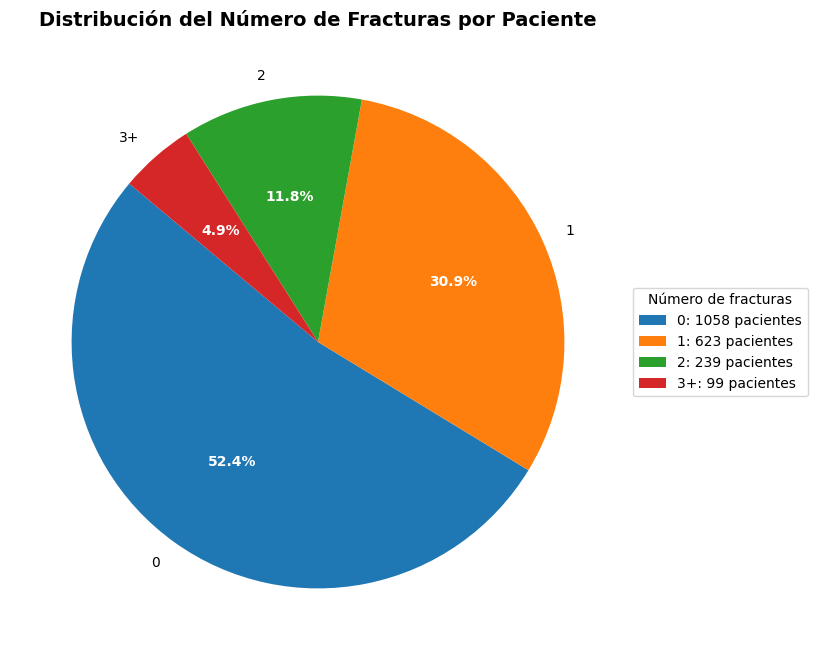

In [9]:
# Calcular el número de fracturas por paciente 
fracture_counts = fracturas_df[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']].sum(axis=1)

# Agrupar el número de fracturas si es mayor o igual a 3
fracture_counts_grouped = fracture_counts.apply(lambda x: '3+' if x >= 3 else str(x)).value_counts().sort_index()

# Crear un gráfico de pastel
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(fracture_counts_grouped, 
        labels=fracture_counts_grouped.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('tab10', len(fracture_counts_grouped)))

# Ajustar el estilo de los porcentajes dentro del gráfico
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Crear una leyenda con color y etiqueta, sin el porcentaje
legend_labels = [f"{label}: {count} pacientes" for label, count in zip(fracture_counts_grouped.index, fracture_counts_grouped)]
plt.legend(wedges, legend_labels, title="Número de fracturas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Añadir el título
plt.title('Distribución del Número de Fracturas por Paciente', fontsize=14, fontweight='bold')
plt.show()


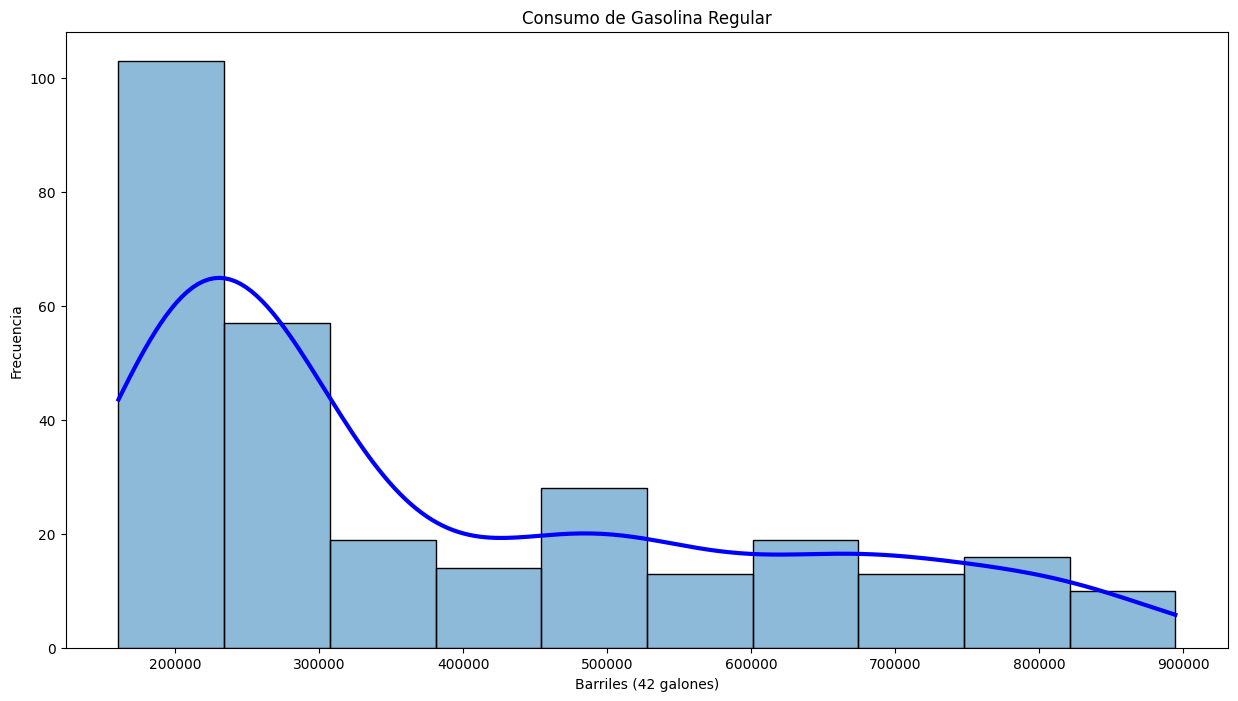

In [10]:
# Configuración de un solo plot para Consumo de Combustibles
plt.figure(figsize=(15, 8))
# Se añade la línea de densidad de probabilidad y se cambia el color de la línea a azul
ax = sns.histplot(consumos_df['Gasolina Regular'], kde=True, line_kws={'lw':3})
ax.lines[0].set_color('blue')

# Se añaden los títulos y etiquetas
plt.title('Consumo de Gasolina Regular')
plt.xlabel('Barriles (42 galones)')
plt.ylabel('Frecuencia')
plt.show()

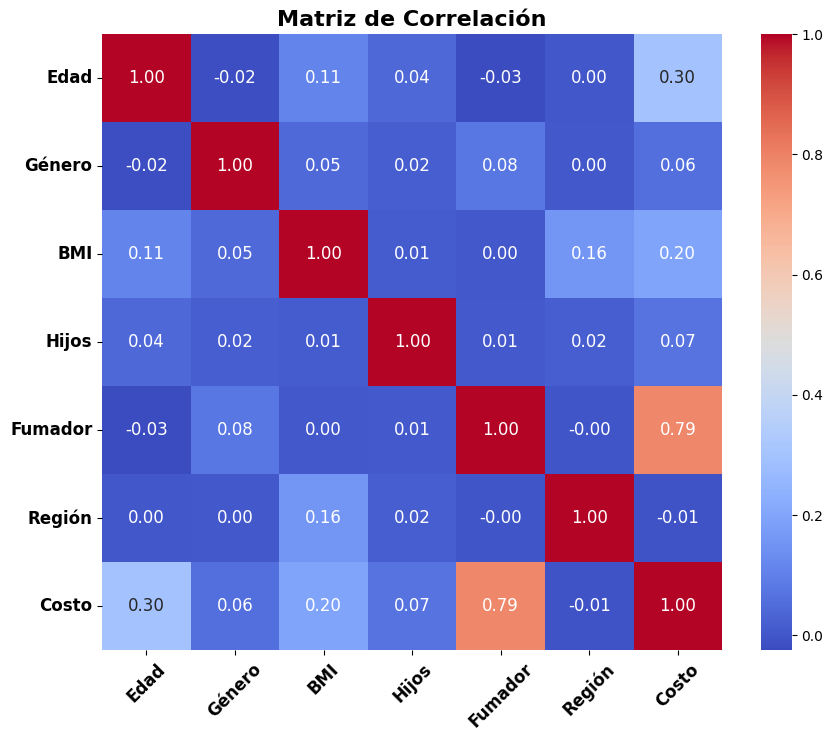

In [11]:
# Calcular la matriz de correlación
correlation_matrix = seguros_df.corr()

# Cambiar nombre de las columnas y filas
correlation_matrix.columns = ['Edad', 'Género', 'BMI', 'Hijos', 'Fumador', 'Región', 'Costo']
correlation_matrix.index = ['Edad', 'Género', 'BMI', 'Hijos', 'Fumador', 'Región', 'Costo']

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': 12}, fmt=".2f")

# Añadir título y etiquetas
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold', rotation=45)
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.show()

### Audiencia en el area de investigacion

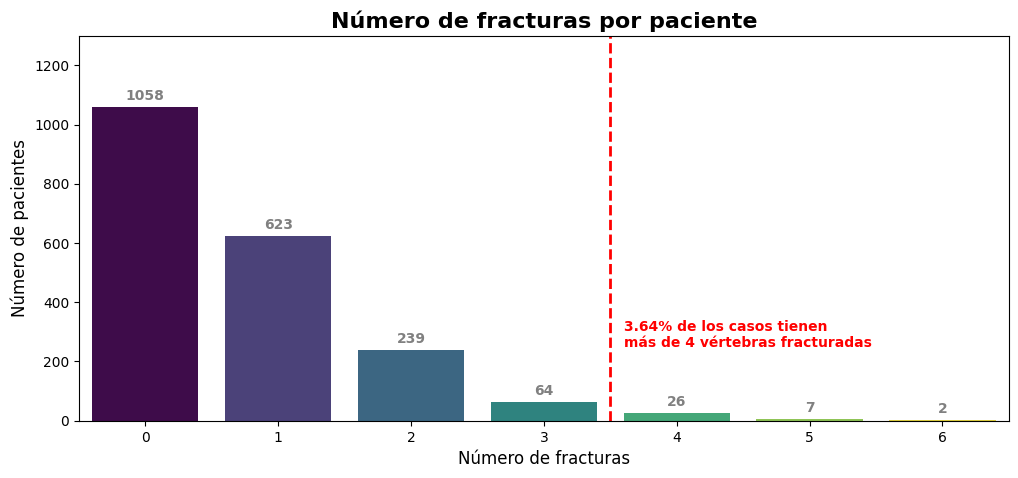

In [12]:
# Gráfico de barras de la cantidad de fracturas por paciente
plt.figure(figsize=(12,5))
# Se suman las fracturas por paciente y se generan barras de colores
ax = sns.countplot(x = fracturas_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1), 
                   hue=fracturas_df[['C1','C2','C3','C4','C5','C6','C7']].sum(axis=1),
                   palette='viridis', 
                   legend=False)

# Se añaden las etiquetas con el número de fracturas
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, fontweight='bold', padding=3, color='gray')

# Se añaden las líneas verticales para indicar el 3% de los casos
plt.axvline(x=3.5, color='red', linestyle='--', linewidth=2)
plt.text(x=3.6, y=250, s=f"{round(35/961*100,2)}% de los casos tienen \nmás de 4 vértebras fracturadas",
         color='red', size=10, weight="bold")

# Se añaden los títulos y etiquetas con un tamaño de letra de 16
plt.title('Número de fracturas por paciente', fontsize=16, fontweight='bold')
plt.xlabel('Número de fracturas', fontsize=12)
plt.ylabel('Número de pacientes', fontsize=12)
plt.ylim([0,1300])
plt.show()

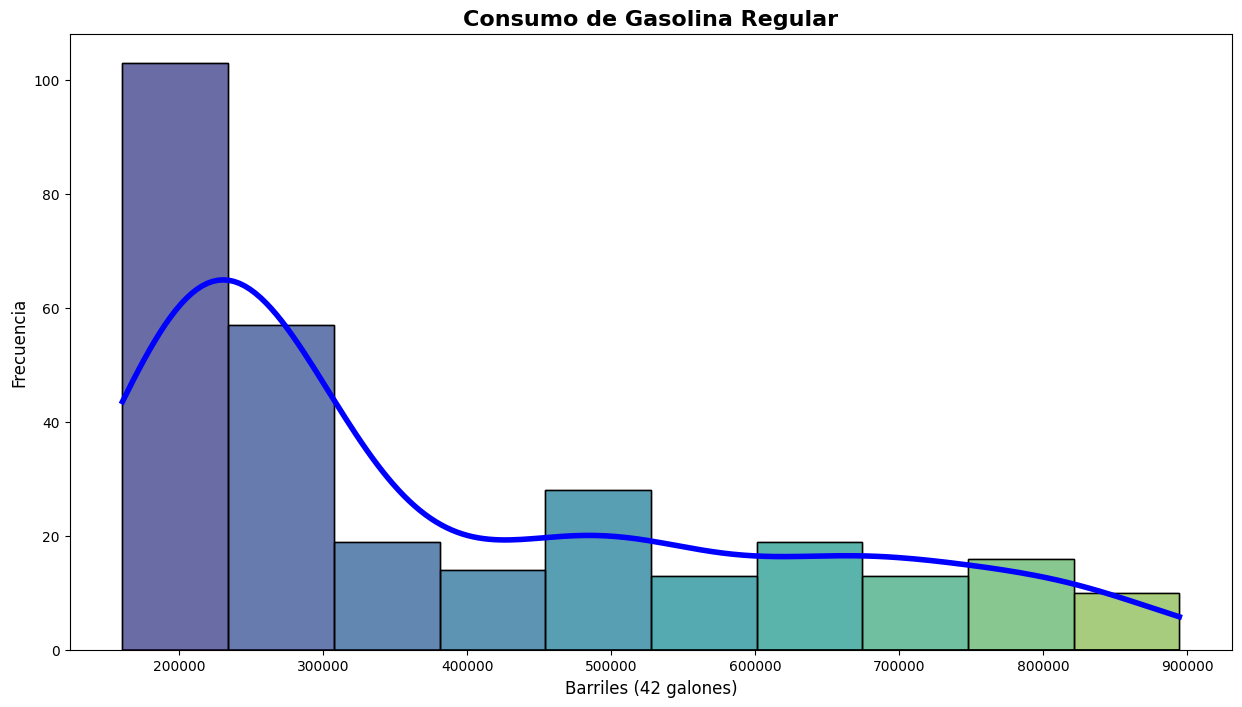

In [13]:
# Gráfico histograma del consumo de gasolina regular
plt.figure(figsize=(15, 8))
# Se agrega un hue para dividir los datos en 10 intervalos
consumos_df['HUE'] = pd.cut(consumos_df['Gasolina Regular'], bins=10)
ax = sns.histplot(consumos_df['Gasolina Regular'], kde=True, line_kws={'lw':4})
sns.histplot(data = consumos_df, 
             x ='Gasolina Regular', 
             hue='HUE',
             palette='viridis',
             legend=False)

# Se cambia el color de la línea de densidad de probabilidad
ax.lines[0].set_color('blue')
ax.set_alpha(0.5)

# Se añaden los títulos y etiquetas
plt.title('Consumo de Gasolina Regular', fontsize=16, fontweight='bold')
plt.xlabel('Barriles (42 galones)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

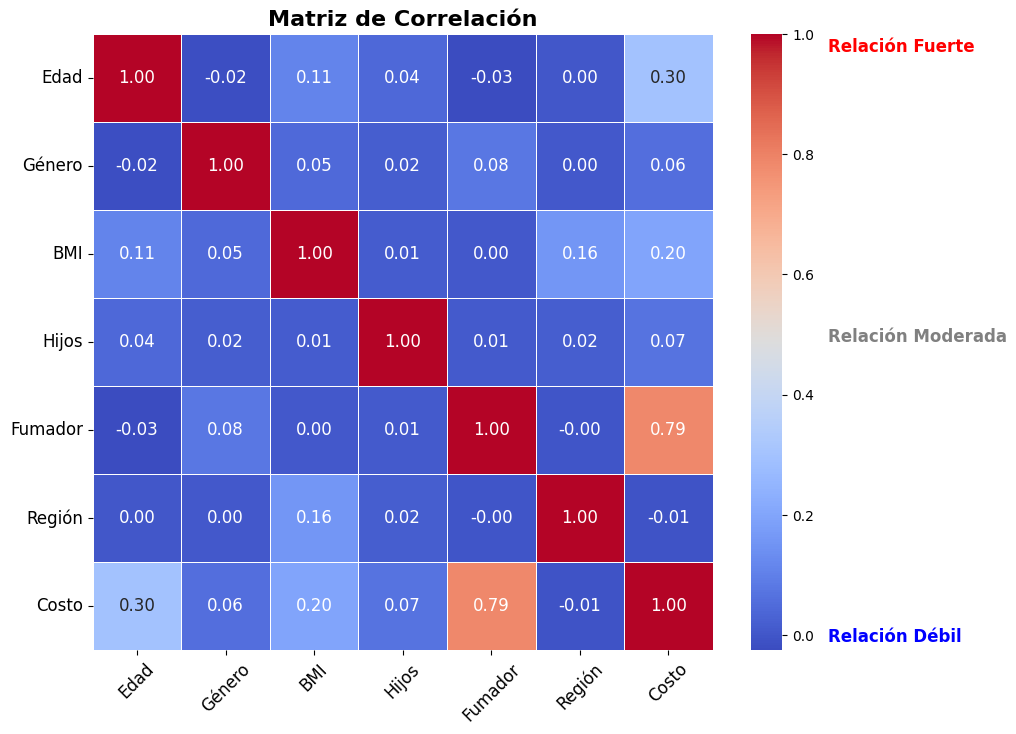

In [14]:
# Calcular la matriz de correlación
correlation_matrix = seguros_df.corr()
# Cambiar nombre de las columnas y filas
correlation_matrix.columns = ['Edad', 'Género', 'BMI', 'Hijos', 'Fumador', 'Región', 'Costo']
correlation_matrix.index = ['Edad', 'Género', 'BMI', 'Hijos', 'Fumador', 'Región', 'Costo']

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, 
            cmap='coolwarm', annot_kws={'fontsize': 12}, 
            fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

# Añadir etiquetas adicionales para indicar la fuerza de la correlación
plt.text(8.3, 0.2, 'Relación Fuerte', fontsize=12, color='red', fontweight='bold')
plt.text(8.3, 3.5, 'Relación Moderada', fontsize=12, color='gray', fontweight='bold')
plt.text(8.3, 6.9, 'Relación Débil', fontsize=12, color='blue', fontweight='bold')

plt.show()